# Stimuli from Images

This notebook shows how to generate random stimuli from a cartoon image.

In [6]:
%matplotlib inline

import sys
import os

# Add parent directory (where pygestalt lives) to sys.path
sys.path.append(os.path.abspath(".."))

from pathlib import Path

import numpy as np
import scipy

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import *

import pygestalt as gs
from pygestalt import sampler

In [7]:
outdir = Path(os.getcwd()) / 'outputs'
os.makedirs(outdir, exist_ok=True)

## Extract contour informations from image

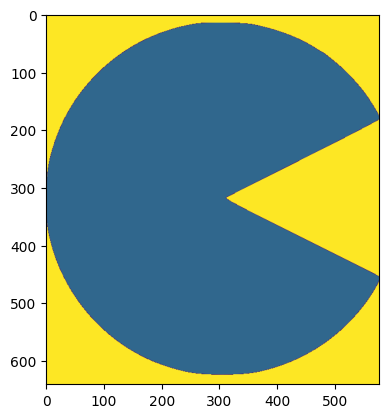

In [8]:
fname = Path('/Users/jgietema/Documents/Stage Donders/pygestalt test/datasets/pacman.png')
image = plt.imread(fname)

X0 = np.mean(image, axis=-1)
plt.imshow(X0, aspect='equal')

In [9]:
Xs, Hs = gs.utils.contour_from_image(X0)

Xs = Xs/X0.shape  # convert to the coordinate in the box [0,1]x[0,1]

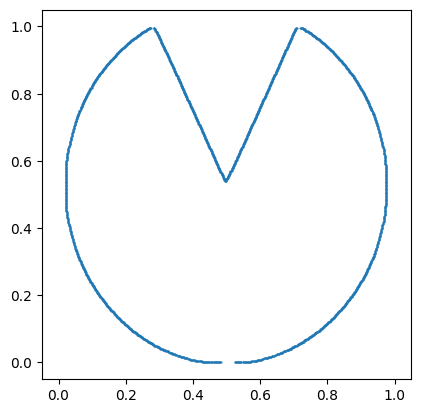

In [10]:
plt.scatter(Xs[:,0], Xs[:,1], marker='.', s=1)
ax = plt.gca()
ax.set_xlim((-0.05,1.05))
ax.set_ylim((-0.05,1.05))
ax.set_aspect('equal')   

## Generation of random stimulus

In [11]:
radius = 0.025
thresh = 1e-3

%time C, _ = sampler.draw_positions(radius, sampler.point_set(Xs), thresh=thresh)
%time D, _ = sampler.draw_positions(radius, sampler.box(), exclusions=C, thresh=thresh)

CPU times: user 1.28 s, sys: 40.9 ms, total: 1.32 s
Wall time: 1.31 s
CPU times: user 9.6 s, sys: 104 ms, total: 9.7 s
Wall time: 9.81 s


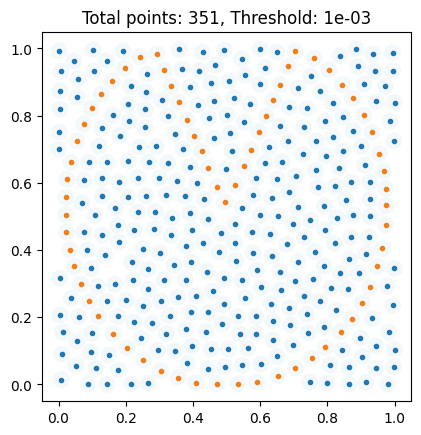

In [12]:
fig, ax = gs.utils.ball_plot(D, C, radius=radius, thresh=thresh)

### Placement of patches

In [13]:
N = 512
xs, ys = np.meshgrid(range(N), range(N))
xys = np.stack([xs,ys]).reshape((2,-1)).T/N

#### Comparison of two patches

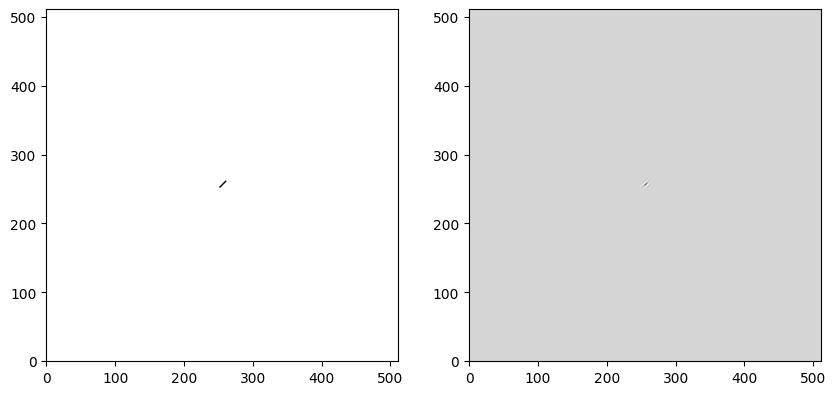

In [14]:
f = 100
σ2 = 0.0025
pgabor = lambda z,h: gs.patch.gabor(z, h, f, σ2)

l=0.025
w=0.005
pseg = lambda z,h: gs.patch.segment(z, h, l, w)

Igabor = pgabor(xys-[0.5,0.5], h=[1,1]).reshape(N,N)
Iseg = pseg(xys-[0.5,0.5], h=[1,1]).reshape(N,N)

fig, axes = plt.subplots(1,2, figsize=(10,10))
axes[0].imshow(Iseg, origin='lower', cmap='Greys')
axes[1].imshow(Igabor, origin='lower', cmap='Greys')

### Generation of stimulus

In [15]:
pfunc = pgabor

N = 1024
If = gs.patch.generate_image_foreground(C, Xs, Hs, N=N, pfunc=pfunc)
Ig = gs.patch.generate_image(D, N=N, pfunc=pfunc)

I = If + Ig

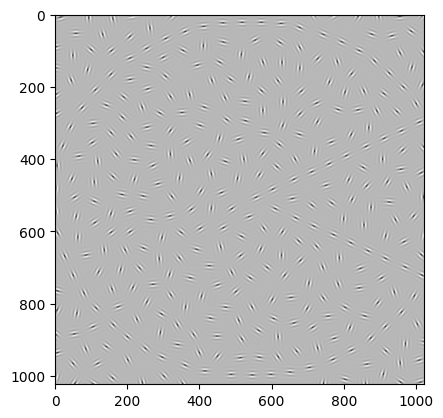

In [16]:
Im = np.fliplr(np.rot90(I,-1))

plt.imshow(Im, aspect='equal', cmap='binary')
# plt.set_cmap('Greys')
# plt.imsave(outdir/f'bunny{N}.png', Im)

In [17]:
pfunc = pseg

N = 1024
If = gs.patch.generate_image_foreground(C, Xs, Hs, N=N, pfunc=pfunc, jitter=0.)
Ig = gs.patch.generate_image(D, N=N, pfunc=pfunc)

I = If + Ig

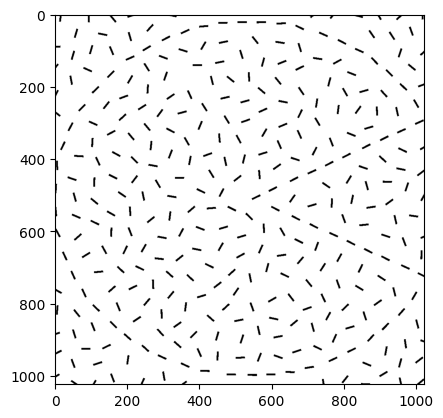

In [18]:
Im = np.fliplr(np.rot90(I,-1))

plt.imshow(Im, aspect='equal', cmap='binary')

### Contour smoothness and jitter

The tangent vectors `Hs` used above are computed numerically from the cartoon image using finite difference. To reduce the high frequency noise due to the numerical tangent, we can set the parameter `ng` in `generate_image_foreground`. This represents the number of nearest points on the contour used to smooth the tangent. A small `ng` typically yields more jitters in the image. Let's compare `ng=1` and `ng=5`.


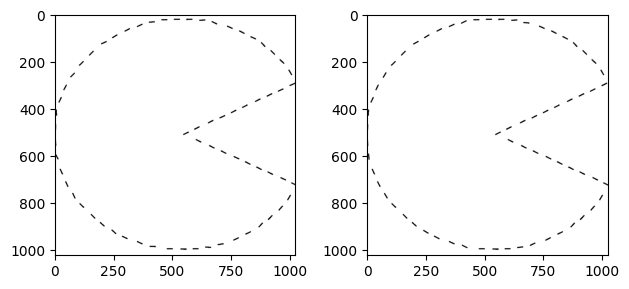

In [19]:
N = 1024
I1 = gs.patch.generate_image_foreground(C, Xs, Hs, N=N, pfunc=pfunc, ng=1)
I2 = gs.patch.generate_image_foreground(C, Xs, Hs, N=N, pfunc=pfunc, ng=5)

fig, axes = plt.subplots(1,2)
Im = np.fliplr(np.rot90(I1,-1))
axes[0].imshow(Im, aspect='equal', cmap='binary')
Im = np.fliplr(np.rot90(I2,-1))
axes[1].imshow(Im, aspect='equal', cmap='binary')
plt.tight_layout()

### Controlable jitter

To add controlable jitters, we can set the parameter `jitter` to a desired degree. Here's the comparison between no jitter and a random jitter at +/- 45 degrees maximum.

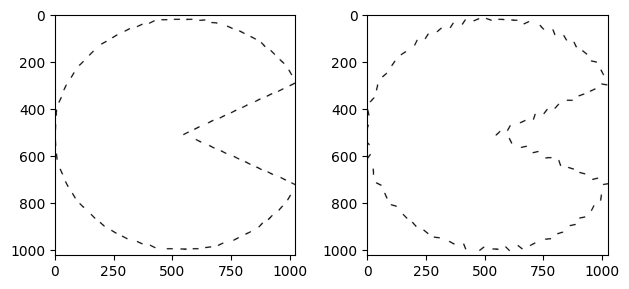

In [20]:
N = 1024
I1 = gs.patch.generate_image_foreground(C, Xs, Hs, N=N, pfunc=pfunc, ng=5, jitter=0)
I2 = gs.patch.generate_image_foreground(C, Xs, Hs, N=N, pfunc=pfunc, ng=5, jitter=45)

fig, axes = plt.subplots(1,2)
Im = np.fliplr(np.rot90(I1,-1))
axes[0].imshow(Im, aspect='equal', cmap='binary')
Im = np.fliplr(np.rot90(I2,-1))
axes[1].imshow(Im, aspect='equal', cmap='binary')
plt.tight_layout()

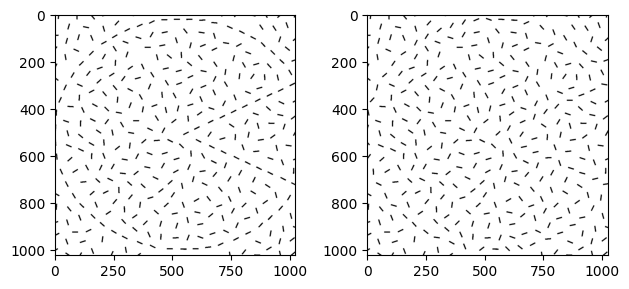

In [21]:
fig, axes = plt.subplots(1,2)
Im = np.fliplr(np.rot90(I1+Ig,-1))
axes[0].imshow(Im, aspect='equal', cmap='binary')
Im = np.fliplr(np.rot90(I2+Ig,-1))
axes[1].imshow(Im, aspect='equal', cmap='binary')
plt.tight_layout()